# Exercise 8 | Anomaly Detection and Collaborative Filtering

In [1]:
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as linalg
from scipy.optimize import fmin_bfgs
from sklearn.metrics import accuracy_score
import math
from numpy import linalg as LA
from scipy.special import expit, logit
import scipy.misc, scipy.io, scipy.optimize, scipy.cluster.vq
import imageio
from matplotlib.pyplot import figure

# Part 1: Load Example Dataset

Visualizing example dataset for outlier detection.


Dimension de X = (307, 2)
Dimension de Xval = (307, 2)
Dimension de yval = (307, 1)


<function matplotlib.pyplot.show(*args, **kw)>

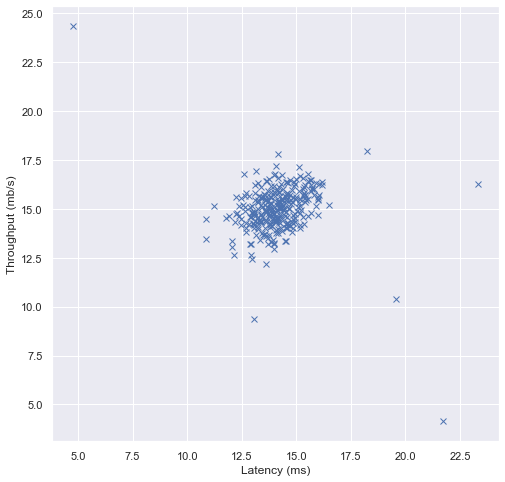

In [2]:
#% Load an example dataset that we will be using
print('Visualizing example dataset for outlier detection.\n\n')
mat = scipy.io.loadmat('ex8data1.mat')

X = mat['X']
Xval = mat["Xval"]
yval = mat["yval"]
print("Dimension de X = {}".format(X.shape))
##########
print("Dimension de Xval = {}".format(Xval.shape))
##########
print("Dimension de yval = {}".format(yval.shape))


plt.figure(figsize=(8,8))
plt.plot(X[:, 0], X[:, 1], 'x')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show


# Part 2: Estimate the dataset statistics

In [3]:
def multivariateGaussian(X, mu, sigma2):
    
    s = sigma2.flatten()
    M = N = len(s)
    
    if sigma2.ndim == 1:
        sigma2 = np.diag(sigma2)

    k = len(mu)
    X = X - mu
    p = (2 * np.pi)** (- k / 2.0) * np.linalg.det(sigma2)**(-0.5) * \
       np.exp(-0.5 * np.sum(X.dot(np.linalg.pinv(sigma2))*X, axis=1))
    
    return p

def visualizeFit(X, mu, sigma2):
    
    x = y = np.arange(0, 30.1, 0.5)
    p = np.arange(-20, 0.1, 3)
    X1,X2 = np.meshgrid(x, y)
    
    Xn = np.c_[(X1.reshape(X1.size, order='F'),
                         X2.reshape(X2.size, order='F'))]
    s = multivariateGaussian(Xn, mu, sigma2)
    #print(s)
    
    S = s.reshape(X1.shape, order='F')
    plt.figure(figsize=(8,8))
    plt.plot(X[:, 0], X[:, 1],'+', markersize=9)
    
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)')
    #hold(True)
    # Do not plot if there are infinities
    if (np.sum(np.isinf(S)) == 0):
        plt.contour(X1, X2, S, np.power(10,p.T))
    plt.show()
    #hold(False)


def estimateGaussian(X):
    m, n = X.shape

    # You should return these values correctly
    
    mu = np.mean(X, axis=0)

    sigma2 = np.var(X, axis=0)

    return mu, sigma2
    
    



Visualizing Gaussian fit.




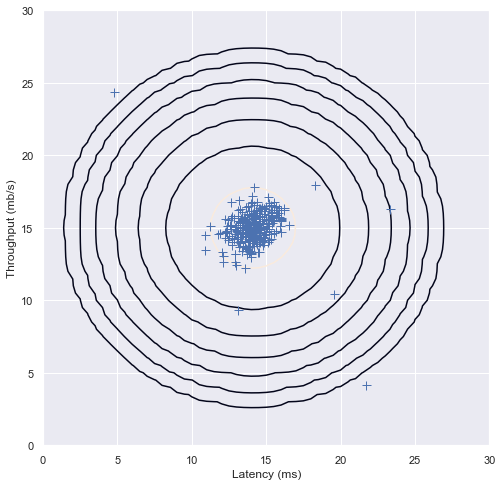

In [4]:
print('Visualizing Gaussian fit.\n\n')
mu, sigma2 = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma2)

visualizeFit(X,  mu, sigma2)


# Part 3: Find Outliers

In [5]:
def selectThreshold(yval, pval):
    bestEpsilon = 0
    bestF1 = 0
    #F1 = 0
    
    stepsize = (np.max(pval) - np.min(pval)) / 1000.0
    m, M = np.min(pval), np.max(pval)
    secc = np.arange(m, M, stepsize)
    
    
    for e in secc:
        tp = yval[pval < e] == 1
        fp = yval[pval < e] == 0
        fn = yval[pval >= e] == 1
        
        tp = tp.astype(float).sum()
        fp = fp.astype(float).sum()
        fn = fn.astype(float).sum()

        # compute precision, recall and F1
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = (2*prec*rec)/(prec+rec) 
    
    
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = e
    
    return bestEpsilon, bestF1
    

In [6]:
pval = multivariateGaussian(Xval, mu, sigma2)

epsilon, F1 = selectThreshold(yval, pval)
print('Best epsilon found using cross-validation:\n',epsilon)
print('Best F1 on Cross Validation Set:  \n',F1)
print('   (you should see a value epsilon of about 8.99e-05)\n')
print('   (you should see a Best F1 value of  0.875000)\n\n')


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


Best epsilon found using cross-validation:
 8.990852779269495e-05
Best F1 on Cross Validation Set:  
 0.8750000000000001
   (you should see a value epsilon of about 8.99e-05)

   (you should see a Best F1 value of  0.875000)




# Part 4: Multidimensional Outliers

In [7]:
#  Loads the second dataset. You should now have the
#  variables X, Xval, yval in your environment
#load('ex8data2.mat');
matt = scipy.io.loadmat('ex8data2.mat')
X = matt["X"]
Xval = matt["Xval"]
yval = matt["yval"]
#  Apply the same steps to the larger dataset
mu, sigma2 = estimateGaussian(X)

#  Training set 
p = multivariateGaussian(X, mu, sigma2)

#  Cross-validation set
pval = multivariateGaussian(Xval, mu, sigma2)

#  Find the best threshold
epsilon, F1 = selectThreshold(yval, pval)

print('Best epsilon found using cross-validation: \n', epsilon)
print('Best F1 on Cross Validation Set:  \n', F1)
print('   (you should see a value epsilon of about 1.38e-18)\n')
print('   (you should see a Best F1 value of 0.615385)\n')
print('# Outliers found: \n\n', sum(p < epsilon))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


Best epsilon found using cross-validation: 
 1.377228890761358e-18
Best F1 on Cross Validation Set:  
 0.6153846153846154
   (you should see a value epsilon of about 1.38e-18)

   (you should see a Best F1 value of 0.615385)

# Outliers found: 

 117


# Part 1: Loading movie ratings dataset

In [8]:
print('Visualizing example dataset for outlier detection.\n\n')
mat = scipy.io.loadmat('ex8_movies.mat')
Y = mat["Y"]
R = mat["R"]


Visualizing example dataset for outlier detection.




Average rating for movie 1 (Toy Story):  3.8783185840707963


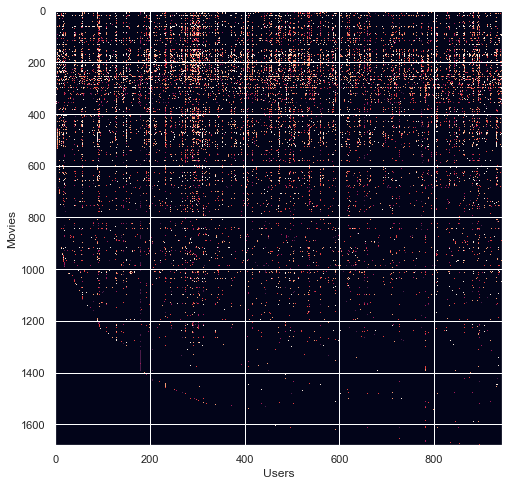

In [9]:
print('Average rating for movie 1 (Toy Story): ',np.mean(Y[0, R[0, :] == 1]))
plt.figure(figsize=(8,8))
plt.imshow(Y, aspect='auto') 
plt.ylabel('Movies')
plt.xlabel('Users')
plt.show(block=False)

# Part 2: Collaborative Filtering Cost Function

In [10]:
mat = scipy.io.loadmat('ex8_movieParams.mat')
X = mat["X"]
Theta = mat["Theta"]
num_users = mat["num_users"]
num_movies = mat["num_movies"]
num_features = mat["num_features"]

In [11]:
num_users = 4
num_movies = 5
num_features = 3
X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[0:num_movies, 0:num_users]
R = R[0:num_movies, 0:num_users]

In [12]:
def cofiCostFunc(params, Y, R, 
                 num_users,
                 num_movies,
                 num_features,
                 lamb):
    
    X = np.reshape(params[0:num_movies*num_features],
                   (num_movies, num_features),
                   "F")
    Theta = np.reshape(params[num_movies*num_features:],
                       (num_users, num_features), 
                       "F")
    t = lamb / 2.0
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)
    #  ====================== YOUR CODE HERE ======================
    # cost
    p = np.dot(X, Theta.T)
    J_orig = np.sum(np.sum(np.square(p-Y)*R, axis=0)) * (1/2.)
    
    theta1 = np.sum(np.square(Theta))
    x = np.sum(np.square(X))

    J = J_orig + (t * (theta1 + x))
    
    
    # gradient

    X_grad = np.dot(( np.dot(X, Theta.T) - Y ) * R, Theta)
    
    Theta_grad = np.dot((( np.dot(X, Theta.T) - Y ) * R).T, X)
    X_grad = X_grad + lamb*X
    Theta_grad = Theta_grad + lamb*Theta
    
    
    # =============================================================

    grad = np.r_[X_grad.reshape(X_grad.size, order='F'),
                           Theta_grad.reshape(Theta_grad.size, order='F')]
    return J, grad


In [13]:
X = X.flatten("F")
Theta = Theta.flatten("F")
params = np.r_[X, Theta]
J, grad = cofiCostFunc(params, Y, R, num_users, num_movies,num_features, 0)

print('Cost at loaded parameters: {}\n(this value should be about 22.22)\n'.format(J))

Cost at loaded parameters: 22.22460372568567
(this value should be about 22.22)



# Part 3: Collaborative Filtering Gradient

In [14]:
def computeNumericalGradient(J, theta):
    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    e = 1e-4
    
    for p in range(theta.size):
        perturb[p] = e
        loss1 = J(theta - perturb)
        loss2 = J(theta + perturb)
        
        numgrad[p] = (loss2[0] - loss1[0]) / (2*e)
        perturb[p] = 0
        
        
    return numgrad 
        
    


def checkCostFunction(lamb = 0):
    
    
    X_t = np.random.rand(4, 3)
    Theta_t = np.random.rand(5, 3)
    
    # Zap out most entries
    Y = np.dot(X_t, Theta_t.T)
    m, n = Y.shape[0],Y.shape[1]
    Y[np.random.rand(m, n) > 0.5] = 0
    
    
    
    
    R = np.zeros(Y.shape)
    R[Y != 0] = 1
    
    # Run Gradient Checking
    X = np.random.randn(X_t.shape[0], X_t.shape[1])
    Theta = np.random.randn(Theta_t.shape[0],
                            Theta_t.shape[1])
    num_users = Y.shape[1]
    num_movies = Y.shape[0]
    num_features = Theta_t.shape[1]
    
    X = X.flatten("F")
    Theta = Theta.flatten("F")
    params = np.r_[X, Theta]
    
    costFunc = lambda t: cofiCostFunc(t, Y, R,
                                      num_users
                                      num_movies
                                      num_features,
                                      lamb)
    
    
    numgrad = computeNumericalGradient(costFunc,
                                       params)
    
    cost, grad = cofiCostFunc(params, Y, R,
                              num_users,
                              num_movies,
                              num_features,
                              lamb)
    
    disp = np.r_[numgrad, grad]
    
    
    print('The above two columns you get should be very similar.\n'\
         '(Left-Your Numerical Gradient, Right-Analytical Gradient)\n\n')
    
    diff = LA.norm(numgrad-grad)/LA.norm(numgrad+grad)
    
    print('If your cost function implementation is correct, then \n'\
         'the relative difference will be small (less than 1e-9). \n'\
         '\nRelative Difference: {}\n'.format(diff))
   
    print("Es diff < 1e-9: ",diff < 1e-9)

In [15]:
print('\nChecking Gradients (without regularization) ... \n')

#  Check gradients by running checkNNGradients
checkCostFunction()



Checking Gradients (without regularization) ... 

The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)


If your cost function implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 1.0700185620506433e-12

Es diff < 1e-9:  True


# Part 4: Collaborative Filtering Cost Regularization

In [16]:
X = X.flatten("F")
Theta = Theta.flatten("F")
params = np.r_[X, Theta]


#  Evaluate cost function
J, grad = cofiCostFunc(params, Y, R,
                 num_users,
                 num_movies,
                 num_features,
                 1.5)

print('Cost at loaded parameters (lambda = 1.5): {} '\
'\n(this value should be about 31.34)\n'.format(J))

Cost at loaded parameters (lambda = 1.5): 31.344056244274213 
(this value should be about 31.34)



# Part 5: Collaborative Filtering Gradient Regularization

In [17]:
print('\nChecking Gradients (with regularization) ... \n')

#  Check gradients by running checkNNGradients
checkCostFunction(1.5)


Checking Gradients (with regularization) ... 

The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)


If your cost function implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 1.5076553844715512e-12

Es diff < 1e-9:  True


# Part 6: Entering ratings for a new user

In [18]:


def loadMovieList():
    file = "movie_ids.txt"
    
    n = 1682
    lista = [None]*n
    i = 0
    with open(file) as f:
        for line in f:
            data = line.strip().split()
            data = data[1:]
            linea = ' '.join(data)
            lista[i] = linea
            i += 1
    return lista
        
    

In [19]:
movieList = loadMovieList()

#  Initialize my ratings
my_ratings = np.zeros((1682, 1))

# Check the file movie_idx.txt for id of each movie in our dataset
# For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings[0] = 4

# Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings[97] = 2

# We have selected a few movies we liked / did not like and the ratings we
# gave are as follows:
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354]= 5

print('\n\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated {} for {}\n'.format(my_ratings[i],
                                         movieList[i]))

print('\nProgram paused. Press enter to continue.\n')




New user ratings:

Rated [4.] for Toy Story (1995)

Rated [3.] for Twelve Monkeys (1995)

Rated [5.] for Usual Suspects, The (1995)

Rated [4.] for Outbreak (1995)

Rated [5.] for Shawshank Redemption, The (1994)

Rated [3.] for While You Were Sleeping (1995)

Rated [5.] for Forrest Gump (1994)

Rated [2.] for Silence of the Lambs, The (1991)

Rated [4.] for Alien (1979)

Rated [5.] for Die Hard 2 (1990)

Rated [5.] for Sphere (1998)


Program paused. Press enter to continue.



# Part 7: Learning Movie Ratings

In [120]:
from scipy.optimize import minimize

In [91]:
def normalizeRatings(Y, R):
    m, n = Y.shape
    Ymean = np.zeros((m, 1))
    Ynorm = np.zeros(Y.shape)
    #print(Ymean.shape, Ynorm.shape)
    for i in range(m):
        idx = R[i, :] == 1
        Ymean[i] = np.mean(Y[i,idx])
        Ynorm[i, idx] = Y[i, idx] - Ymean[i]
    return Ynorm, Ymean

In [141]:
print('\nTraining collaborative filtering...\n')

#  Load data
mat = scipy.io.loadmat('ex8_movies.mat')
Y = mat["Y"]
R = mat["R"]
print("Dimension de Y = {}".format(Y.shape))
print("Dimension de R = {}".format(R.shape))
#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 
#  943 users
#
#  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#  rating to movie i

#  Add our own ratings to the data matrix
Y = np.c_[my_ratings, Y]
ratings = [my_ratings != 0]
ratings = np.multiply(ratings, 1)
R = np.c_[my_ratings,R]

Ynorm, Ymean = normalizeRatings(Y, R)

#  Useful Values
#num_users = Y.shape[1]
num_movies, num_users = Y.shape
num_features = 10

# Set Initial Parameters (Theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

initial_parameters = np.r_[X.flatten("F"), Theta.flatten("F")]
maxiter = 100
params = {'disp': True, 'maxiter':maxiter}
lamb = 10


costFunc = lambda params : cofiCostFunc(params, Y, R, 
                 num_users,
                 num_movies,
                 num_features,
                 lamb)
# Set Regularization
results = minimize(costFunc, x0=initial_parameters,
                   options=options, 
                   method="L-BFGS-B", 
                   jac=True)
theta = results["x"]

# Unfold the returned theta back into U and W
X = np.reshape(theta[:num_movies*num_features],
               (num_movies, num_features),
               order='F')

Theta = np.reshape(theta[num_movies*num_features:],
                   (num_users, num_features),
                   order='F')

print('Recommender system learning completed.\n')



Training collaborative filtering...

Dimension de Y = (1682, 943)
Dimension de R = (1682, 943)
Recommender system learning completed.



# Part 8: Recommendation for you

In [22]:
T = np.random.rand(4, 5)
T = np.where(T > 0.5, T, 0)
T

array([[0.        , 0.        , 0.57430937, 0.72968639, 0.        ],
       [0.        , 0.89240764, 0.        , 0.7430966 , 0.        ],
       [0.        , 0.55292287, 0.94989842, 0.67013976, 0.85038726],
       [0.86158383, 0.88610071, 0.81763109, 0.97725203, 0.59539171]])

In [142]:
p = np.dot(X, Theta.T)
my_predictions = p[:,0] + Ymean.flatten()

movieList = loadMovieList()

ix = my_predictions.argsort()[::-1]

print('\n\nTop recommendations for you:\n')
for i in range(10):
    j = ix[i]
    print('Predicting rating {:.5f} for movie {:s}'.format(my_predictions[j], movieList[j]))

print('\n\nOriginal ratings provided:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated {:d} for {:s}'.format(int(my_ratings[i]), movieList[i]))



Top recommendations for you:

Predicting rating 9.66051 for movie Titanic (1997)
Predicting rating 9.38225 for movie Star Wars (1977)
Predicting rating 9.14735 for movie Shawshank Redemption, The (1994)
Predicting rating 9.14328 for movie Raiders of the Lost Ark (1981)
Predicting rating 8.97064 for movie Good Will Hunting (1997)
Predicting rating 8.93777 for movie Braveheart (1995)
Predicting rating 8.89476 for movie Return of the Jedi (1983)
Predicting rating 8.84002 for movie Empire Strikes Back, The (1980)
Predicting rating 8.76153 for movie As Good As It Gets (1997)
Predicting rating 8.75977 for movie Usual Suspects, The (1995)


Original ratings provided:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 f